## PCA (Principal Component Analysis, Dimensionality Reduction Process)

As the number of features or dimensions in a dataset increases, the amount of data required to obtain a statistically significant result increases exponentially. This can lead to issues such as overfitting, increased computation time, and reduced accuracy of machine learning models 📈. This is known as the curse of dimensionality problems that arise while working with high-dimensional data. 

### Story Time

🪄 Imagine your FM radio as a magical device. Inside, there's a world with many radio stations, each like a different door to music. Principal Component Analysis (PCA) is a bit like a wizard's spell for data, helping us make sense of complex information. In our radio world, it's like finding the most important doors while ignoring the ones we don't need. When you turn the radio knob, you're using a magical wand to pick the exact music door you want to open, leaving out the ones you don't want 🎵✨. And, just like making sure your favorite music is loud and clear, PCA and radio use tricks to make sure the music you love sounds great without noisy interruptions 🎶. So, while PCA doesn't really cast spells on radios, these ideas help us enjoy our radio adventures and understand our data better, making both more magical in our daily lives. 🧙‍♂️📻

In [1]:
import pandas as pd
import numpy as np
 
# Here we are using inbuilt dataset of scikit learn
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer(as_frame=True)

# creating dataframe
df = cancer.frame
 
# checking shape
print('Original Dataframe shape :',df.shape)
 
# Print dataset 
print(df.info())

# Input features
X = df[cancer['feature_names']]

Original Dataframe shape : (569, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    fl

### Overcoming Feature Overload 🚀

Is your dataset looking like a treasure chest with a mountain of features? 📦🏔️ Fear not! We have a solution to make your model training and testing faster while reducing the risk of overfitting. 🎯

### The Challenge 🤔

You're dealing with a dataset imported from sklearn library, and it's a behemoth with nearly 30 columns or features. 📈📉 But hold on! More features don't always mean better results. In fact, they can lead to slower model training and the dreaded overfitting monster. 😱

### The Solution 🛠️

Let's trim the fat and get lean and mean! We need a strategy to reduce the number of features. 

#### Feature Selection 🧐

Think of feature selection as panning for gold in a river of data. We'll sift through all those columns and only keep the nuggets that matter. 


## Step-By-Step Explanation of PCA (Principal Component Analysis) 🛤️

**Step 1: Standardization** 📏

First, we need to standardize our dataset to ensure that each variable has a mean of 0 and a standard deviation of 1.

`Z = {X - mu} / {sigma}`   

![Standardization](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-9a39cfcb7649d719ef13776cce3ecda0_l3.svg)

Here,

`mu` is the mean of independent features,  
`sigma` is the standard deviation of independent features. 


In [2]:
# Mean
X_mean = X.mean()

# Standard deviation
X_std = X.std()

# Standardization
Z = (X - X_mean) / X_std

print(X_mean, X_std, Z)

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

We started with the first and most crucial step: standardizing the data. 📏 To do this, we calculated the mean and standard deviation of each feature in the feature space. 📊💡

**Step 2: Covariance Matrix Computation** 📊

Covariance measures the strength of joint variability between two or more variables, indicating how much they change in relation to each other.

![Formula For Covariance Matrix Calculation](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-a9f7569d00480192b75f3d38055e1529_l3.svg)

The value of covariance can be positive, negative, or zeros.

- Positive: As `x1` increases, `x2` also increases.
- Negative: As `x1` increases, `x2` also decreases.
- Zeros: No direct relation

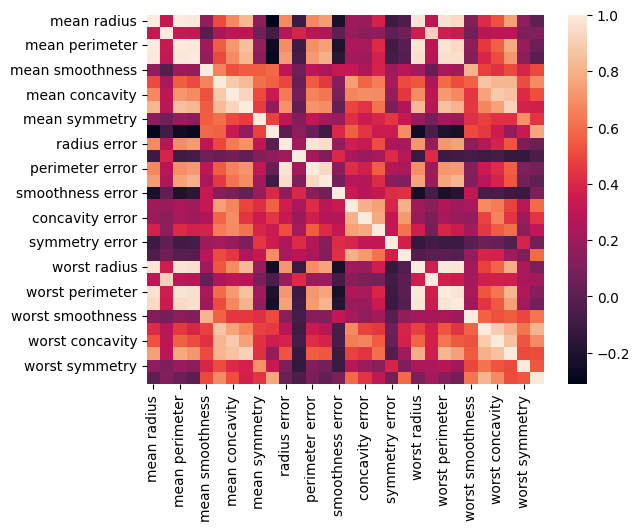

In [3]:
# covariance
c = Z.cov()

# Plot the covariance matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(c)
plt.show()

We now computed Covariance Matrix. The covariance matrix helps us visualize how strong the dependency of two features is with each other in the feature space.

A covariance matrix heatmap, like a colorful chart 📈🌈, shows how closely different things in your data are linked. Bright colors mean strong connections, while light colors mean weak ones. You can spot groups of things that often change together, like friends dancing to the same beat at a party. It's like seeing who's leading the dance and who's just following. The heatmap's symmetry shows that the connections work both ways. So, it's a picture that helps you understand how your data moves together or apart, making it easier to see which parts are important.

**Step 3: Compute Eigenvalues and Eigenvectors of Covariance Matrix to Identify Principal Components** 🧮

Let `A` be a square `nXn` matrix and `X` be a non-zero vector for which 

![AX = lambda X](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-60384c5ce1abcb24694f89550aff6d9c_l3.svg)

for some scalar values `lambda`. Then `lambda` is known as the eigenvalue of matrix `A` and `X` is known as the eigenvector of matrix `A` for the corresponding eigenvalue.

It can also be written as :

![AX - lambda X = 0, (A - lambda I)X = 0](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-d484659a01a1e820f0b4c3cb1e9df756_l3.svg)

where `I` is the identity matrix of the same shape as matrix `A`. And the above conditions will be true only if `(A - lambda I)` will be non-invertible (i.e., a singular matrix). That means,

![|A - lambda I| = 0](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-be120def60ad50285342b93c3f1e5073_l3.svg)  


In [4]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

# Index the eigenvalues in descending order 
idx = eigenvalues.argsort()[::-1]

# Sort the eigenvalues in descending order 
eigenvalues = eigenvalues[idx]

# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]

Eigen values:
 [1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02]
Eigen values Shape: (30,)
Eigen Vector Shape: (30, 30)


We've calculated the "eigen what?"—eigenvalues and eigenvectors 🤯—for our features, which are like magic spells in understanding our data. It's like discovering secret recipes for our dataset. Then, we lined up these recipes in order of importance, like a chef sorting their favorite ingredients first 🍳. This helps us figure out the key ingredients that make our data delicious and ready for analysis. 🌟🔍

Think of your dataset as a treasure map 🗺️, and the features are like the landmarks on that map. Now, eigenvalues and eigenvectors are like the magical tools you have to read the map 🧙‍♂️🔍. The eigenvalues are the secret codes 🕵️‍♂️ that tell you how important each feature is; the bigger the eigenvalue, the more important the feature. The eigenvectors, on the other hand, are like the arrows 🏹 that show you in which direction to look for those important features. By following the arrows of the eigenvectors, you can find the hidden treasures 🏆 in your data, knowing which features matter most for your analysis. 🎯📊

In [5]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

Explained variance is the term that gives us an idea of the amount of the total variance which has been retained by selecting the principal components instead of the original feature space.

### Determine the Number of Principal Components 

In [6]:
n_components = np.argmax(explained_var >= 0.50) + 1
n_components

2

We can either consider the number of principal components of any value of our choice or by limiting the explained variance. Here I am considering explained variance more than equal to 50%. We got 2 no of principal axis for this model. 

### Project the Data onto the Selected Principal Components

Find the projection matrix, It is a matrix of eigenvectors corresponding to the largest eigenvalues of the covariance matrix of the data. it projects the high-dimensional dataset onto a lower-dimensional subspace
The eigenvectors of the covariance matrix of the data are referred to as the principal axes of the data, and the projection of the data instances onto these principal axes are called the principal components. 

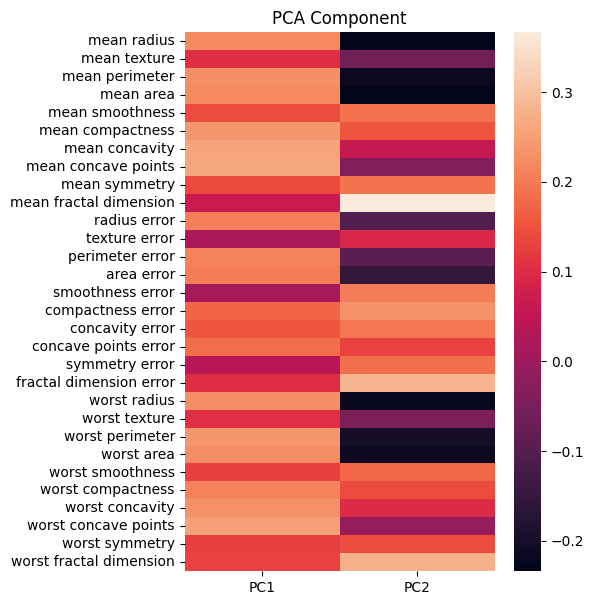

In [7]:
# PCA component or unit matrix
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(u,
							index = cancer['feature_names'],
							columns = ['PC1','PC2']
							)

# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()


The code performed PCA, a magical technique 🧙‍♂️, and creates a heatmap 📊 that's like a colorful treasure map. Each cell in the map represents the connection between a feature and the first two principal components ('PC1' and 'PC2'). Dark colors reveal strong links, while lighter shades show weaker connections. It's a visual guide to help you see how features and principal components dance together in your data. This map is like a secret code 🔍 to unlock the hidden patterns and relationships, guiding your analysis in a more efficient direction, like finding the best path in a maze 🗺️.

You can compare and evaluate from these two heatmaps.

Then, we project our dataset using the formula:  
![](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-895a2e72455eb7165897c08c4c153196_l3.svg)

Dimensionality reduction is then obtained by only retaining those axes (dimensions) that account for most of the variance, and discarding all others.

![](https://media.geeksforgeeks.org/wp-content/uploads/20230420165637/Finding-Projection-in-PCA.webp)

Finding Projection in PCA

In [8]:
# Matrix multiplication or dot Product
Z_pca = Z @ pca_component
# Rename the columns name
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2'}, axis=1, inplace=True)
# Print the Pricipal Component values
print(Z_pca)

          PCA1       PCA2
0     9.184755   1.946870
1     2.385703  -3.764859
2     5.728855  -1.074229
3     7.116691  10.266556
4     3.931842  -1.946359
..         ...        ...
564   6.433655  -3.573673
565   3.790048  -3.580897
566   1.255075  -1.900624
567  10.365673   1.670540
568  -5.470430  -0.670047

[569 rows x 2 columns]


The eigenvectors of the covariance matrix of the data are referred to as the principal axes of the data, and the projection of the data instances onto these principal axes are called the principal components. Dimensionality reduction is then obtained by only retaining those axes (dimensions) that account for most of the variance, and discarding all others.

## PCA using Using Sklearn

There are different libraries in which the whole process of the principal component analysis has been automated by implementing it in a package as a function and we just have to pass the number of principal components which we would like to have. Sklearn is one such library that can be used for the PCA as shown below.

In [9]:
# Importing PCA
from sklearn.decomposition import PCA

# Let's say, components = 2
pca = PCA(n_components=2)
pca.fit(Z)
x_pca = pca.transform(Z)

# Create the dataframe
df_pca1 = pd.DataFrame(x_pca,
					columns=['PC{}'.
					format(i+1)
						for i in range(n_components)])
print(df_pca1)

           PC1        PC2
0     9.184755   1.946870
1     2.385703  -3.764859
2     5.728855  -1.074229
3     7.116691  10.266556
4     3.931842  -1.946359
..         ...        ...
564   6.433655  -3.573673
565   3.790048  -3.580897
566   1.255075  -1.900624
567  10.365673   1.670540
568  -5.470430  -0.670047

[569 rows x 2 columns]


We can match from the above Z_pca result from it is exactly the same values.

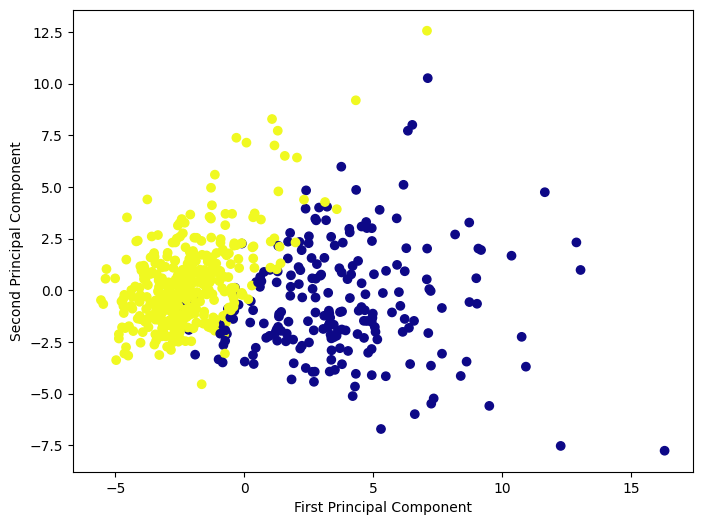

In [10]:
# giving a larger plot
plt.figure(figsize=(8, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 1],
			c=cancer['target'],
			cmap='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

The above scatter plot is a larger display 📈, where each point represents a data sample projected onto the first two principal components obtained through PCA. The colors of the points are determined by the 'target' variable from the cancer dataset, and the 'plasma' colormap adds a vibrant touch to the plot 🎨. The x-axis is labeled as 'First Principal Component,' and the y-axis is labeled as 'Second Principal Component,' indicating the directions of the principal components. This visualization allows us to see how the data samples are distributed in the reduced two-dimensional space, helping us discern any patterns, clusters, or separations among them, such as identifying different groups within the dataset 🎯🔍.

## Advantages of PCA

PCA (Principal Component Analysis) is like a data wizard 🧙‍♂️ that simplifies complex data with many benefits:

1. 📊 **Dimension Reduction**: It reduces the number of features, making data more manageable.
2. 💡 **Feature Selection**: It highlights the most important information.
3. 🌟 **Pattern Recognition**: It unveils hidden patterns and relationships.
4. 📈 **Data Visualization**: It helps plot data in a more understandable way.

For example, think of a colorful image. PCA turns it into a black and white sketch, preserving the main contours and shapes. 🖼️

## Limitations of PCA

1. Loss of Detail: PCA simplifies data, like turning a detailed painting into an abstract sketch. Imagine reducing a colorful photo of a sunset to black and white – you'd lose the vibrant hues 🌅.

2. Linearity Assumption: PCA assumes relationships are linear, but real-life data can be curvy. It's like expecting all your favorite songs to follow a straight beat, but some are jazzier 🎵.

3. Outliers Impact: Outliers can skew PCA results. Think of an outlier as that one friend who dances to a completely different rhythm at a party, throwing off your group's groove 💃.

4. Interpretability: While PCA simplifies, it can make results less intuitive. Imagine describing a complex novel using only a few emojis – you might miss some key plot details 📚🤔.

Example: Consider a dataset of mixed emotions from user reviews (happy, sad, and surprised). PCA might reduce them to "neutral" as the first principal component, losing the essence of each emotion 😐😢😲.

With the right feature reduction strategy, you'll have a streamlined dataset that powers your model efficiently, delivering accurate results without the headache of overfitting. 🏆

Get ready to conquer your data challenges! 🌟✨

For more details on PCA, click on the link.
[Step-by-Step Explanation of Principal Component Analysis](https://builtin.com/data-science/step-step-explanation-principal-component-analysis)
